# Partie1 : Prétraitement de données

In [ ]:
#Importer les bibliothèques necessaires
import numpy as np
import pandas as pd
from google.colab import drive

In [ ]:
#Se connecter au drive et récupérer les données
drive.mount('/content/gdrive')
%cd gdrive/MyDrive/datasets
file = pd.read_csv("dataset_trx.csv",sep=",")
dataset_brute = pd.DataFrame(file)

Mounted at /content/gdrive
/content/gdrive/MyDrive/datasets


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (8,11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
#Traiter les données nulles
dataset_brute=dataset_brute.replace('\\N',np.nan)
dataset_brute.isnull().sum()

Unnamed: 0                          0
id                                  0
codeNetwork                       173
codePDA                             0
codeSalePoint                       0
codeService                         0
commission                          0
date                                0
destinataire                        3
frais                             173
numTransFromPartenaire         293789
loginAgent                          0
montant                             7
type                              116
paymentMode                    216667
tag                                 0
token                               0
sms                              2535
code_proxy                     294781
categorie                      151565
actionDone                       5499
userDoneAction                   5499
partner_dist_transaction_id    222340
call_back_url                  225625
network_groupe_code                 0
spareOp1                          173
spareOp2    

In [ ]:
dataset_brute.shape

(297037, 51)

In [ ]:
#Fonction pour supprimer l'ensemble des données
def remove_nan(dataset):
  column_with_nan = dataset.columns[dataset.isnull().any()]
  for column in column_with_nan:
    if dataset[column].isnull().sum() >=1000 :
      dataset.drop(column,1, inplace=True)
  dataset.drop(['id','Unnamed: 0','tag','commission','spareOp1','destinataire'],1, inplace=True)
  dataset = dataset.dropna (axis = 'index', how = 'any')
  return dataset


In [ ]:
#Nouveau dataset sans valeurs nulles
not_null_dataset = remove_nan(dataset_brute)
not_null_dataset.isnull().sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  import sys


codeNetwork            0
codePDA                0
codeSalePoint          0
codeService            0
date                   0
frais                  0
loginAgent             0
montant                0
type                   0
token                  0
network_groupe_code    0
spareOp4               0
dtype: int64

In [ ]:
#Séparer la colonne date en date et heure
def format_colonne(dataset):
  dataset[['date_trx','heure_trx']] = dataset.date.str.split(" ",expand=True)
  dataset['montant'] = pd.to_numeric(dataset['montant'])
  dataset['montant_total']  = dataset[['montant','frais']].sum(axis=1)
  dataset.drop(['date','montant','frais'],1, inplace=True)
  return dataset
dataset = not_null_dataset.copy()
format_dataset = format_colonne(dataset)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [ ]:
#Le dataset pour le modèle de machine learning
format_dataset[ format_dataset['loginAgent']==776084616]

,codeNetwork,codePDA,codeSalePoint,codeService,loginAgent,type,token,network_groupe_code,spareOp4,date_trx,heure_trx,montant_total
107750,UCAD,PW90876,UCAD11281,PAIEMENTMARCHANDEM,776084616,PAIEMENTMARCHANDEM,1642602438854,SN,CAISSIER,2022-01-19,14:28:13,25000.0
231264,UCAD,PW90876,UCAD11281,SN_PAIEMENTMARCHAND_WIZALL,776084616,SN_PAIEMENTMARCHAND_WIZALL,1646403860381,SN,CAISSIER,2022-03-04,14:24:53,25000.0
231269,UCAD,PW90876,UCAD11281,SN_PAIEMENTMARCHAND_WIZALL,776084616,SN_PAIEMENTMARCHAND_WIZALL,1646404037644,SN,CAISSIER,2022-03-04,14:27:36,25000.0
237252,UCAD,PW90876,UCAD11281,SN_PAIEMENTMARCHAND_WIZALL,776084616,SN_PAIEMENTMARCHAND_WIZALL,1646559987342,SN,CAISSIER,2022-03-06,09:46:46,50000.0
237258,UCAD,PW90876,UCAD11281,SN_PAIEMENTMARCHAND_WIZALL,776084616,SN_PAIEMENTMARCHAND_WIZALL,1646560195081,SN,CAISSIER,2022-03-06,09:50:03,50000.0
237288,UCAD,PW90876,UCAD11281,SN_PAIEMENTMARCHAND_WIZALL,776084616,SN_PAIEMENTMARCHAND_WIZALL,1646561731895,SN,CAISSIER,2022-03-06,10:15:46,25000.0
237299,UCAD,PW90876,UCAD11281,SN_PAIEMENTMARCHAND_WIZALL,776084616,SN_PAIEMENTMARCHAND_WIZALL,1646560386645,SN,CAISSIER,2022-03-06,10:21:33,50000.0
237306,UCAD,PW90876,UCAD11281,SN_PAIEMENTMARCHAND_WIZALL,776084616,SN_PAIEMENTMARCHAND_WIZALL,1646562375092,SN,CAISSIER,2022-03-06,10:26:25,25000.0
237421,UCAD,PW90876,UCAD11281,SN_PAIEMENTMARCHAND_WIZALL,776084616,SN_PAIEMENTMARCHAND_WIZALL,1646568747352,SN,CAISSIER,2022-03-06,12:13:07,25000.0
237435,UCAD,PW90876,UCAD11281,SN_PAIEMENTMARCHAND_WIZALL,776084616,SN_PAIEMENTMARCHAND_WIZALL,1646569282121,SN,CAISSIER,2022-03-06,12:21:31,25000.0


In [ ]:
# Calculer et assigner une colonne contenant les montants moyens par jour par agent
"""def aggregate_dataset(dataset):
  df1=dataset.copy()
  df2=dataset.copy()
  data1 = df1.groupby(['loginAgent','date_trx'])['montant_total'].agg(['mean']).reset_index()
  data2 = df2.groupby(['loginAgent','date_trx']).size().reset_index(name="counts")
  len_dataset = dataset.shape[0]
  dataset=dataset.assign(montant_moyen_agent_jour=0.0)
  dataset=dataset.assign(trx_agent_jour=0)
  print(dataset.columns)
  for i in range(len_dataset):
    login,date = dataset.iloc[i]['loginAgent'],dataset.iloc[i]['date_trx']
    ##### Montant moyen
    montant=np.max(np.where((data1['loginAgent']==login) & (data1['date_trx']==date),data1['mean'],0))
    #### Nombre de trx moyen
    count=np.max(np.where((data2['loginAgent']==login) & (data2['date_trx']==date),data2['counts'],0))
    dataset['trx_agent_jour'].iloc[i]=count
    dataset['montant_moyen_agent_jour'].iloc[i]=montant
  return dataset"""


'def aggregate_dataset(dataset):\n  df1=dataset.copy()\n  df2=dataset.copy()\n  data1 = df1.groupby([\'loginAgent\',\'date_trx\'])[\'montant_total\'].agg([\'mean\']).reset_index()\n  data2 = df2.groupby([\'loginAgent\',\'date_trx\']).size().reset_index(name="counts")\n  len_dataset = dataset.shape[0]\n  dataset=dataset.assign(montant_moyen_agent_jour=0.0)\n  dataset=dataset.assign(trx_agent_jour=0)\n  print(dataset.columns)\n  for i in range(len_dataset):\n    login,date = dataset.iloc[i][\'loginAgent\'],dataset.iloc[i][\'date_trx\']\n    ##### Montant moyen\n    montant=np.max(np.where((data1[\'loginAgent\']==login) & (data1[\'date_trx\']==date),data1[\'mean\'],0))\n    #### Nombre de trx moyen\n    count=np.max(np.where((data2[\'loginAgent\']==login) & (data2[\'date_trx\']==date),data2[\'counts\'],0))\n    dataset[\'trx_agent_jour\'].iloc[i]=count\n    dataset[\'montant_moyen_agent_jour\'].iloc[i]=montant \n  return dataset'

In [ ]:
"""dataset=format_dataset.copy()
data_agg = aggregate_dataset(dataset)"""

'dataset=format_dataset.copy()\ndata_agg = aggregate_dataset(dataset)'

In [ ]:
#Charger le dernier dataset pour ne pas run la fonction encore une fois
new_file = pd.read_csv("newDataset",sep=",")
dataset_moteur = pd.DataFrame(new_file)
dataset_moteur['date'] = pd.to_datetime(dataset_moteur["date_trx"].astype(str) + " " + dataset_moteur["heure_trx"])
dataset_moteur.drop(['Unnamed: 0','heure_trx','date_trx'],1, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """


In [ ]:
## Le nombre de connexion par agent par heure
"""def nombre_connexion_heure(dataset) :
  df=dataset.copy()
  len_dataset = dataset.shape[0]
  dataset=dataset.assign(nombre_connexion_heure=0.0)
  data = df.groupby(['loginAgent',pd.Grouper(key='date', freq='H')])['token'].size().reset_index()
  for i in range(len_dataset):
    login,date = dataset.iloc[i]['loginAgent'],dataset.iloc[i]['date']
    con  = np.max(np.where((data['loginAgent']==login) & (abs(data['date']-date).astype('timedelta64[h]')< 1 ),data['token'],0))
    dataset['nombre_connexion_heure'].iloc[i]=con
  return dataset"""


"def nombre_connexion_heure(dataset) : \n  df=dataset.copy()\n  len_dataset = dataset.shape[0]\n  dataset=dataset.assign(nombre_connexion_heure=0.0)\n  data = df.groupby(['loginAgent',pd.Grouper(key='date', freq='H')])['token'].size().reset_index()\n  for i in range(len_dataset):\n    login,date = dataset.iloc[i]['loginAgent'],dataset.iloc[i]['date']\n    con  = np.max(np.where((data['loginAgent']==login) & (abs(data['date']-date).astype('timedelta64[h]')< 1 ),data['token'],0))\n    dataset['nombre_connexion_heure'].iloc[i]=con\n  return dataset"

In [ ]:
"""d  = dataset_moteur.copy()
da = nombre_connexion_heure(d)
da.to_csv('BrandNewDataset.csv')"""

"d  = dataset_moteur.copy()\nda = nombre_connexion_heure(d)\nda.to_csv('BrandNewDataset.csv')"

In [ ]:
#Charger le dernier dataset pour ne pas run la fonction encore une fois
brand_new_file = pd.read_csv("BrandNewDataset.csv",sep=",")
new_dataset_moteur = pd.DataFrame(brand_new_file)
new_dataset_moteur.drop('Unnamed: 0',1, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


In [ ]:
new_dataset_moteur = new_dataset_moteur.rename(columns={'montant_moyen_agent_jour':'montant_moyen_agent_diff_jour','trx_agent_jour':'trx_agent_diff_jour',
                                   'nombre_connexion_heure':'nombre_connexion_diff_heure'})

In [ ]:
#Une fonction pour calculer les moyennes globales
"""def moyenne_global(dataset):
  df=dataset.copy()
  data = df.groupby(['loginAgent'])['montant_moyen_agent_diff_jour','trx_agent_diff_jour','nombre_connexion_diff_heure'].mean().reset_index()
  len_dataset = dataset.shape[0]
  dataset=dataset.assign(montant_moyen_agent_par_jour=0.0,trx_agent_par_jour=0,nombre_connexion_par_heure=0)
  for i in range(len_dataset):
    login = dataset.iloc[i]['loginAgent']
    mon,trx,conn = np.amax(np.where((data['loginAgent']==login),[data['montant_moyen_agent_diff_jour'],
                                                                            data['trx_agent_diff_jour'],data['nombre_connexion_diff_heure']],0),axis=1)

    [dataset['montant_moyen_agent_par_jour'].iloc[i],dataset['trx_agent_par_jour'].iloc[i],
                          dataset['nombre_connexion_par_heure'].iloc[i]]  = [mon,trx,conn]

  return dataset"""

"def moyenne_global(dataset):\n  df=dataset.copy()\n  data = df.groupby(['loginAgent'])['montant_moyen_agent_diff_jour','trx_agent_diff_jour','nombre_connexion_diff_heure'].mean().reset_index()\n  len_dataset = dataset.shape[0]\n  dataset=dataset.assign(montant_moyen_agent_par_jour=0.0,trx_agent_par_jour=0,nombre_connexion_par_heure=0)\n  for i in range(len_dataset):\n    login = dataset.iloc[i]['loginAgent']\n    mon,trx,conn = np.amax(np.where((data['loginAgent']==login),[data['montant_moyen_agent_diff_jour'],\n                                                                            data['trx_agent_diff_jour'],data['nombre_connexion_diff_heure']],0),axis=1)\n  \n    [dataset['montant_moyen_agent_par_jour'].iloc[i],dataset['trx_agent_par_jour'].iloc[i],\n                          dataset['nombre_connexion_par_heure'].iloc[i]]  = [mon,trx,conn]\n    \n  return dataset"

In [ ]:
"""df = new_dataset_moteur.copy()
finished_dataset_moteur = moyenne_global(df)
finished_dataset_moteur.to_csv("finished.csv")"""

'df = new_dataset_moteur.copy()\nfinished_dataset_moteur = moyenne_global(df)\nfinished_dataset_moteur.to_csv("finished.csv")'

# Partie2: Le moteur de règle

In [ ]:
!pip install efficient-apriori

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
finished_file = pd.read_csv("finished.csv",sep=",")
finished_dataset_moteur = pd.DataFrame(finished_file)
finished_dataset_moteur.drop(['Unnamed: 0','token'],1, inplace=True)
#formater pour avoir des int
final_dataset_moteur = finished_dataset_moteur.round({"trx_agent_par_jour":0,"nombre_connexion_par_heure":0,"nombre_connexion_diff_heure":0}).astype({"trx_agent_par_jour":'int64',"nombre_connexion_par_heure":'int64',"nombre_connexion_diff_heure":'int64'})


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
final_dataset_moteur[['date_trx','heure_trx']] = final_dataset_moteur.date.str.split(" ",expand=True)
final_dataset_moteur.drop(['date_trx','date','codeNetwork','codePDA','codeSalePoint','type','montant_moyen_agent_diff_jour','trx_agent_diff_jour','nombre_connexion_diff_heure','trx_agent_par_jour','nombre_connexion_par_heure'],1,inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [ ]:
final_dataset_moteur[final_dataset_moteur['loginAgent']=='776084616']["codeService"].value_counts()

SN_INIT_PAIEMENT_TP           411
PAIEMENTMARCHANDOMSN2          56
SN_PAIEMENTMARCHAND_WIZALL     54
PAIEMENTMARCHANDTIGO            8
SNPAIEMENTORABANKNGENIUS        7
Name: codeService, dtype: int64

In [ ]:
#Calculer l'écart de chaque montant à la moyenne
def ecart_moyenne(dataset):
  dataset['ecart'] = abs(dataset['montant_total']-dataset['montant_moyen_agent_par_jour'])
  return dataset

In [ ]:
moteur_dataset=ecart_moyenne(final_dataset_moteur)

In [ ]:
#Transformer le dataset
def transform_heure(dataset):
  dataset['heure'] = dataset.heure_trx.str.split(":",expand=True)[0]
  dataset.drop('heure_trx',1,inplace=True)
  return dataset

In [ ]:
moteur_dataset = transform_heure(moteur_dataset)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


In [ ]:
moteur_dataset

,codeService,loginAgent,network_groupe_code,spareOp4,montant_total,montant_moyen_agent_par_jour,ecart,heure
0,SN_INIT_PAIEMENT_TP,776084616,SN,CAISSIER,50250.00,26491.674270,23758.325730,10
1,MYTP_PAIEMENTMARCHANDOMSN2,707217465,SN,CAISSIER,103.53,14748.747164,14645.217164,12
2,SN_INIT_PAIEMENT_TP,776084616,SN,CAISSIER,50250.00,26491.674270,23758.325730,14
3,CI_CASHOUT_WIZALL,76200895,CITCH,CAISSIER,200.00,435.000000,235.000000,17
4,SN_INIT_PAIEMENT_TP,181838075,SN,CAISSIER,5025.00,5025.000000,0.000000,17
...,...,...,...,...,...,...,...,...
296736,ML_FC_ENERGIA,22176644699,ML,CAISSIER,1000.00,3409.464745,2409.464745,23
296737,ML_FC_ENERGIA,22176644699,ML,CAISSIER,2500.00,3409.464745,909.464745,23
296738,ML_FC_ENERGIA,22176644699,ML,CAISSIER,1500.00,3409.464745,1909.464745,23
296739,ML_FC_ENERGIA,22176644699,ML,CAISSIER,1500.00,3409.464745,1909.464745,23


**Transformer les montants**

In [ ]:
def transform_montant(dataset,col,liste):
  a =  dataset[col].quantile(liste).to_frame()
  q1,q2,q3 = a[col].to_list()
  dataset[col] = np.where(dataset[col]<q1,'faible',np.where(dataset[col]<q2,'moyen',
                                                            np.where(dataset[col]<q3,'elevé','très elevé')))
  return dataset


In [ ]:
listq1 = [0.75, 0.85,0.95]
listq2 = [0.50, 0.75,0.95]
moteur_dataset = transform_montant(moteur_dataset,'montant_total',listq1)
moteur_dataset = transform_montant(moteur_dataset,'montant_moyen_agent_par_jour',listq2)

**Transformer l'heure**

In [ ]:
def transHeure(dataset,col):
  dataset = dataset.astype({"heure": int}, errors='raise')
  dataset[col] = np.where(dataset[col]<8,'fermeture',np.where(dataset[col]<16,'journee',
                                                            np.where(dataset[col]<20,'soir','nuit')))
  return dataset

In [ ]:
moteur_dataset = transHeure(moteur_dataset,'heure')

In [ ]:
moteur_dataset.drop('ecart',1,inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
moteur_dataset['loginAgent'].astype(str)

0           776084616
1           707217465
2           776084616
3            76200895
4           181838075
             ...     
296736    22176644699
296737    22176644699
296738    22176644699
296739    22176644699
296740    22176644699
Name: loginAgent, Length: 296741, dtype: object

In [ ]:
moteur_dataset['montant_moyen_agent_par_jour'] = moteur_dataset['montant_moyen_agent_par_jour'].apply(lambda x: 'M_'+x)

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori,association_rules
moteur_dataset['loginAgent']=moteur_dataset['loginAgent'].astype('string')

In [ ]:
moteur_dataset.shape

(296741, 7)

In [ ]:
"""data_l = moteur_dataset[moteur_dataset["loginAgent"]=='784570193']
list_l = data_l.values.tolist()
te = TransactionEncoder()
te_ary = te.fit(list_l).transform(list_l)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = apriori(df, min_support=0.03, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
rules['length'] =rules['consequents'].apply(lambda x: len(x))
a = rules[(rules["length"]==6) & (rules['antecedents'].apply(lambda x: '784570193' in x))]
#frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
#frequent_itemsets"""

'data_l = moteur_dataset[moteur_dataset["loginAgent"]==\'784570193\']\nlist_l = data_l.values.tolist()\nte = TransactionEncoder()\nte_ary = te.fit(list_l).transform(list_l)\ndf = pd.DataFrame(te_ary, columns=te.columns_)\nfrq_items = apriori(df, min_support=0.03, use_colnames=True)\nrules = association_rules(frq_items, metric ="lift", min_threshold = 1) \nrules = rules.sort_values([\'confidence\', \'lift\'], ascending =[False, False]) \nrules[\'length\'] =rules[\'consequents\'].apply(lambda x: len(x))\na = rules[(rules["length"]==6) & (rules[\'antecedents\'].apply(lambda x: \'784570193\' in x))]\n#frequent_itemsets[\'length\'] = frequent_itemsets[\'itemsets\'].apply(lambda x: len(x))\n#frequent_itemsets'

In [ ]:
"""#Boucler apriori sur les agents
listLogin = dataset_moteur['loginAgent'].unique()
rules_df  = pd.DataFrame()
for log in listLogin :
  #print(log)
  data_l = moteur_dataset[moteur_dataset["loginAgent"]==log]
  list_l = data_l.values.tolist()
  te = TransactionEncoder()
  te_ary = te.fit(list_l).transform(list_l)
  df = pd.DataFrame(te_ary, columns=te.columns_)
  frq_items = apriori(df, min_support=0.01, use_colnames=True)
  rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
  rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
  rules['length'] =rules['consequents'].apply(lambda x: len(x))
  a =rules[(rules["length"]==6) & (rules['antecedents'].apply(lambda x: log in x))]
  rules_df = rules_df.append(a, ignore_index=True)
  rules_df.to_csv("rules_1.csv")"""

'#Boucler apriori sur les agents\nlistLogin = dataset_moteur[\'loginAgent\'].unique()\nrules_df  = pd.DataFrame()\nfor log in listLogin :\n  #print(log)\n  data_l = moteur_dataset[moteur_dataset["loginAgent"]==log]\n  list_l = data_l.values.tolist()\n  te = TransactionEncoder()\n  te_ary = te.fit(list_l).transform(list_l)\n  df = pd.DataFrame(te_ary, columns=te.columns_)\n  frq_items = apriori(df, min_support=0.01, use_colnames=True)\n  rules = association_rules(frq_items, metric ="lift", min_threshold = 1) \n  rules = rules.sort_values([\'confidence\', \'lift\'], ascending =[False, False]) \n  rules[\'length\'] =rules[\'consequents\'].apply(lambda x: len(x))\n  a =rules[(rules["length"]==6) & (rules[\'antecedents\'].apply(lambda x: log in x))]\n  rules_df = rules_df.append(a, ignore_index=True)\n  rules_df.to_csv("rules_1.csv")'

In [ ]:
r =pd.read_csv("rules_1.csv")

In [ ]:
r

,Unnamed: 0,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,length
0,0,frozenset({'776084616'}),"frozenset({'SN', 'CAISSIER', 'faible', 'SN_INI...",1.0,0.337591,0.337591,0.337591,1.0,0.0,1.0,6
1,1,frozenset({'776084616'}),"frozenset({'SN', 'CAISSIER', 'faible', 'SN_INI...",1.0,0.226277,0.226277,0.226277,1.0,0.0,1.0,6
2,2,frozenset({'776084616'}),"frozenset({'SN', 'CAISSIER', 'faible', 'SN_INI...",1.0,0.100365,0.100365,0.100365,1.0,0.0,1.0,6
3,3,frozenset({'776084616'}),"frozenset({'PAIEMENTMARCHANDOMSN2', 'SN', 'CAI...",1.0,0.093066,0.093066,0.093066,1.0,0.0,1.0,6
4,4,frozenset({'776084616'}),"frozenset({'SN', 'CAISSIER', 'faible', 'SN_INI...",1.0,0.085766,0.085766,0.085766,1.0,0.0,1.0,6
...,...,...,...,...,...,...,...,...,...,...,...
56604,56604,frozenset({'1545680451'}),"frozenset({'M_faible', 'CAISSIER', 'faible', '...",1.0,1.000000,1.000000,1.000000,1.0,0.0,inf,6
56605,56605,frozenset({'1140119168'}),"frozenset({'M_faible', 'CAISSIER', 'faible', '...",1.0,1.000000,1.000000,1.000000,1.0,0.0,inf,6
56606,56606,frozenset({'682607985'}),"frozenset({'M_faible', 'CM', 'CAISSIER', 'faib...",1.0,1.000000,1.000000,1.000000,1.0,0.0,inf,6
56607,56607,frozenset({'771817833'}),"frozenset({'CASHINOM', 'SN', 'CAISSIER', 'nuit...",1.0,1.000000,1.000000,1.000000,1.0,0.0,inf,6


# Partie3  :  Machine Learning

In [ ]:
#Librairie necessaire
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import IsolationForest
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

In [ ]:
final_ml_dataset  = format_dataset.copy()
final_ml_dataset.drop(['token','date_trx'],1, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [ ]:
final_ml_dataset

,codeNetwork,codePDA,codeSalePoint,codeService,loginAgent,type,network_groupe_code,spareOp4,heure_trx,montant_total
1,UCAD,PW90876,UCAD11281,SN_INIT_PAIEMENT_TP,776084616,SN_INIT_PAIEMENT_TP,SN,CAISSIER,10:44:30,50250.00
2,MTPSN,PW132439,INTER11998,MYTP_PAIEMENTMARCHANDOMSN2,707217465,PAIEMENTOM,SN,CAISSIER,12:27:08,103.53
3,UCAD,PW90876,UCAD11281,SN_INIT_PAIEMENT_TP,776084616,SN_INIT_PAIEMENT_TP,SN,CAISSIER,14:56:15,50250.00
4,ABCDE,CI2472,CIABD0956,CI_CASHOUT_WIZALL,76200895,CI_WIZALLMONEY,CITCH,CAISSIER,17:10:27,200.00
5,UCAD,PWA55432,UCAD14351,SN_INIT_PAIEMENT_TP,181838075,SN_INIT_PAIEMENT_TP,SN,CAISSIER,17:15:06,5025.00
...,...,...,...,...,...,...,...,...,...,...
297032,WAVE,ML769810,WAVE5023,ML_FC_ENERGIA,22176644699,ENERGIA,ML,CAISSIER,23:59:07,1000.00
297033,WAVE,ML769810,WAVE5023,ML_FC_ENERGIA,22176644699,ENERGIA,ML,CAISSIER,23:59:22,2500.00
297034,WAVE,ML769810,WAVE5023,ML_FC_ENERGIA,22176644699,ENERGIA,ML,CAISSIER,23:59:23,1500.00
297035,WAVE,ML769810,WAVE5023,ML_FC_ENERGIA,22176644699,ENERGIA,ML,CAISSIER,23:59:25,1500.00


In [ ]:
final_ml_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296741 entries, 1 to 297036
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   codeNetwork          296741 non-null  object 
 1   codePDA              296741 non-null  object 
 2   codeSalePoint        296741 non-null  object 
 3   codeService          296741 non-null  object 
 4   loginAgent           296741 non-null  object 
 5   type                 296741 non-null  object 
 6   network_groupe_code  296741 non-null  object 
 7   spareOp4             296741 non-null  object 
 8   heure_trx            296741 non-null  object 
 9   montant_total        296741 non-null  float64
dtypes: float64(1), object(9)
memory usage: 24.9+ MB


In [ ]:
final_ml_dataset['loginAgent']=final_ml_dataset['loginAgent'].astype(str)

In [ ]:
dict_encoder = {}

In [ ]:
#Encodes les variables categorielles avec LabelEncoder
def encode(dataset):
  for name in dataset.columns:
    if dataset[name].dtype == 'O' and name != "heure_trx":
      clf = LabelEncoder()
      dataset[name] = clf.fit_transform(dataset[name])
      dict_encoder[name] = clf
  return dataset, dict_encoder

In [ ]:
#Encoder les heures
def cos_encoding_hour(x):
  return np.cos((x/24)*2*np.pi)
#Encoder les minutes
def cos_encoding_min(x):
  return np.cos((x/60)*2*np.pi)
#Fonction global
def encode_time(dataset):
  dataset[['heure','min','sec']] = dataset.heure_trx.str.split(":",expand=True)
  dataset.drop(['heure_trx','sec'],1,inplace=True)
  dataset['heure'] = dataset['heure'].astype("int64").apply(cos_encoding_hour)
  dataset['min'] = dataset['min'].astype("int64").apply(cos_encoding_min)
  return dataset

In [ ]:
data  = final_ml_dataset.copy()
result = encode(data)
inter_ml_dataset = result[0]
dict_encoder = result[1]
dataset  = inter_ml_dataset.copy()
encode_ml_dataset = encode_time(dataset)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
encode_ml_dataset

,codeNetwork,codePDA,codeSalePoint,codeService,loginAgent,type,network_groupe_code,spareOp4,montant_total,heure,min
1,422,11377,10191,187,9350,119,12,0,50250.00,-0.866025,-1.045285e-01
2,293,11225,5453,152,6201,110,12,0,103.53,-1.000000,-9.510565e-01
3,422,11377,10191,187,9350,119,12,0,50250.00,-0.866025,9.135455e-01
4,0,657,948,88,7265,25,6,0,200.00,-0.258819,5.000000e-01
5,422,11805,10192,187,1863,119,12,0,5025.00,-0.258819,6.123234e-17
...,...,...,...,...,...,...,...,...,...,...,...
297032,435,2924,10288,138,2087,37,11,0,1000.00,0.965926,9.945219e-01
297033,435,2924,10288,138,2087,37,11,0,2500.00,0.965926,9.945219e-01
297034,435,2924,10288,138,2087,37,11,0,1500.00,0.965926,9.945219e-01
297035,435,2924,10288,138,2087,37,11,0,1500.00,0.965926,9.945219e-01


In [ ]:
encode_ml_dataset.shape

(296741, 11)

In [ ]:
X_train,X_test  = train_test_split(encode_ml_dataset.to_numpy())

In [ ]:
import pickle
d = pickle.load(open("classifers.pkl","rb"))[0]

In [ ]:
X.shape

(1, 11)

In [ ]:
X = pd.DataFrame(encode_ml_dataset.iloc[0]).to_numpy().reshape(1,-1)
s = d.decision_function(X)
print(s)

[-0.0840704]


In [ ]:
"""len = X_train.shape[1]
model = IsolationForest(max_features=len)
param_grid = {'n_estimators': list(range(100, 800, 100)),
              'max_samples': list(range(100, 500, 100)),
              'contamination': [0.1, 0.2, 0.3, 0.4, 0.5],
              'bootstrap': [True, False],
              'n_jobs': [5, 10, 20, 30]}
def scorer_f(estimator, X):   #your own scorer
      return np.mean(estimator.score_samples(X))
search = GridSearchCV(model, param_grid,cv=10,scoring=scorer_f)
search.fit(X_train[:1000])
print("Best parameter (CV score=%0.3f):" % search.best_score_)"""

'len = X_train.shape[1]\nmodel = IsolationForest(max_features=len)\nparam_grid = {\'n_estimators\': list(range(100, 800, 100)), \n              \'max_samples\': list(range(100, 500, 100)), \n              \'contamination\': [0.1, 0.2, 0.3, 0.4, 0.5], \n              \'bootstrap\': [True, False], \n              \'n_jobs\': [5, 10, 20, 30]}\ndef scorer_f(estimator, X):   #your own scorer\n      return np.mean(estimator.score_samples(X))\nsearch = GridSearchCV(model, param_grid,cv=10,scoring=scorer_f)\nsearch.fit(X_train[:1000])\nprint("Best parameter (CV score=%0.3f):" % search.best_score_)'

In [ ]:
len = X_train.shape[1]
IForest = IsolationForest(bootstrap=False, max_samples=1000, n_estimators = 256, n_jobs = 20, max_features = len,verbose=3)
IForest.fit(X_train)

[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.


Building estimator 1 of 13 for this parallel run (total 256)...
Building estimator 1 of 13 for this parallel run (total 256)...
Building estimator 1 of 13 for this parallel run (total 256)...
Building estimator 1 of 13 for this parallel run (total 256)...
Building estimator 1 of 13 for this parallel run (total 256)...
Building estimator 1 of 13 for this parallel run (total 256)...
Building estimator 1 of 13 for this parallel run (total 256)...
Building estimator 1 of 13 for this parallel run (total 256)...
Building estimator 1 of 13 for this parallel run (total 256)...
Building estimator 1 of 13 for this parallel run (total 256)...
Building estimator 1 of 13 for this parallel run (total 256)...Building estimator 1 of 13 for this parallel run (total 256)...
Building estimator 1 of 13 for this parallel run (total 256)...
Building estimator 1 of 13 for this parallel run (total 256)...
Building estimator 1 of 13 for this parallel run (total 256)...Building estimator 1 of 13 for this parall

[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:    8.4s remaining:  1.3min
[Parallel(n_jobs=20)]: Done   9 out of  20 | elapsed:    8.6s remaining:   10.6s


Building estimator 12 of 13 for this parallel run (total 256)...
Building estimator 13 of 13 for this parallel run (total 256)...
Building estimator 13 of 13 for this parallel run (total 256)...
Building estimator 13 of 13 for this parallel run (total 256)...
Building estimator 13 of 13 for this parallel run (total 256)...Building estimator 13 of 13 for this parallel run (total 256)...

Building estimator 13 of 13 for this parallel run (total 256)...


[Parallel(n_jobs=20)]: Done  16 out of  20 | elapsed:    8.9s remaining:    2.2s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    9.0s finished


IsolationForest(max_features=11, max_samples=1000, n_estimators=256, n_jobs=20,
                verbose=3)

In [ ]:
data  = pd.DataFrame(X_train,columns=encode_ml_dataset.columns)
data['scores'] = IForest.decision_function(X_train)

In [ ]:
data

,codeNetwork,codePDA,codeSalePoint,codeService,loginAgent,type,network_groupe_code,spareOp4,montant_total,heure,min,scores
0,392.0,10667.0,5273.0,45.0,10671.0,96.0,12.0,0.0,100.0,-1.836970e-16,0.104528,0.024512
1,344.0,11053.0,8476.0,45.0,8889.0,84.0,12.0,0.0,251000.0,2.588190e-01,-0.994522,0.021729
2,356.0,5838.0,8913.0,77.0,7513.0,129.0,12.0,0.0,3000.0,-2.588190e-01,-0.104528,-0.003977
3,302.0,1028.0,8038.0,46.0,2119.0,87.0,6.0,0.0,10302.0,-7.071068e-01,0.978148,0.077243
4,258.0,1100.0,5936.0,34.0,2590.0,69.0,6.0,0.0,5000.0,5.000000e-01,-0.866025,0.046839
...,...,...,...,...,...,...,...,...,...,...,...,...
222550,384.0,5627.0,9473.0,45.0,6979.0,84.0,12.0,0.0,10000.0,-8.660254e-01,-0.994522,0.041682
222551,317.0,5.0,8070.0,201.0,4385.0,135.0,0.0,0.0,200000.0,-2.588190e-01,-0.587785,0.030598
222552,270.0,7918.0,7038.0,132.0,7031.0,64.0,11.0,0.0,200.0,-1.000000e+00,0.500000,0.029230
222553,288.0,3929.0,7663.0,6.0,10781.0,100.0,11.0,0.0,800.0,-7.071068e-01,-0.951057,0.031573


In [ ]:
kmean = KMeans(n_clusters=2)
X  = data['scores'].to_numpy().reshape(-1,1)
kmean.fit(X)
unique,count = np.unique(kmean.labels_,return_counts = True)
dict(zip(unique,count))

{0: 165340, 1: 57215}

In [ ]:
#Evaluation du modèle
from sklearn import metrics
labels = kmean.labels_
metrics.silhouette_score(X, labels, metric='euclidean')

0.6184509704791604

In [ ]:
import pickle
models = [IForest, kmean]
encoders = dict_encoder
with open("encoders.pkl",'wb') as ef:
  pickle.dump(dict_encoder,ef)
with open("classifers.pkl",'wb') as cf :
  pickle.dump(models, cf)

In [ ]:
d

{'codeNetwork': LabelEncoder(),
 'codePDA': LabelEncoder(),
 'codeSalePoint': LabelEncoder(),
 'codeService': LabelEncoder(),
 'loginAgent': LabelEncoder(),
 'type': LabelEncoder(),
 'network_groupe_code': LabelEncoder(),
 'spareOp4': LabelEncoder()}

In [ ]:
data['labels'] = kmean.labels_
data.head()

,codeNetwork,codePDA,codeSalePoint,codeService,loginAgent,type,network_groupe_code,spareOp4,montant_total,heure,min,scores,labels
0,392.0,10667.0,5273.0,45.0,10671.0,96.0,12.0,0.0,100.0,-1.836970e-16,0.104528,0.024512,0
1,344.0,11053.0,8476.0,45.0,8889.0,84.0,12.0,0.0,251000.0,2.588190e-01,-0.994522,0.021729,0
2,356.0,5838.0,8913.0,77.0,7513.0,129.0,12.0,0.0,3000.0,-2.588190e-01,-0.104528,-0.003977,1
3,302.0,1028.0,8038.0,46.0,2119.0,87.0,6.0,0.0,10302.0,-7.071068e-01,0.978148,0.077243,0
4,258.0,1100.0,5936.0,34.0,2590.0,69.0,6.0,0.0,5000.0,5.000000e-01,-0.866025,0.046839,0


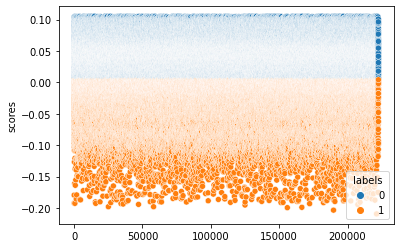

In [ ]:
#Visualisation des clusters
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(x=data.index,y=data['scores'],hue=data['labels'])

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
x = data.iloc[:,:-1]
x = StandardScaler().fit_transform(x)
pca = PCA(n_components=2)
df = pd.DataFrame(pca.fit_transform(x))
df.shape

(222555, 2)

In [ ]:
finalDf = pd.concat([df, data[['labels']]], axis = 1)

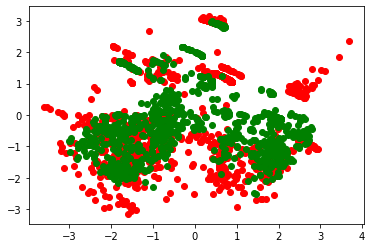

In [ ]:
#filter rows of original data
x_r = finalDf[finalDf['labels' ]== 0]

y_r = finalDf[finalDf['labels'] == 1]

#Plotting the results
plt.scatter(y_r.iloc[:1000,0] , y_r.iloc[:1000,1] , color = 'red')
plt.scatter(x_r.iloc[:1000,0] , x_r.iloc[:1000,1] , color = 'green')
plt.show()

In [ ]:
#Représentation 3D des clusters
x_3d = data.iloc[:,:-1]
x_3d = StandardScaler().fit_transform(x_3d)
pca1 = PCA(n_components=3)
df_3d = pd.DataFrame(pca1.fit_transform(x_3d))
df_3d.shape

(222555, 3)

In [ ]:
finalDf_3d = pd.concat([df_3d, data[['labels']]], axis = 1)

In [ ]:
point_max = data[data['scores']==data.scores.max()].index
point_min = data[data['scores']==data.scores.min()].index

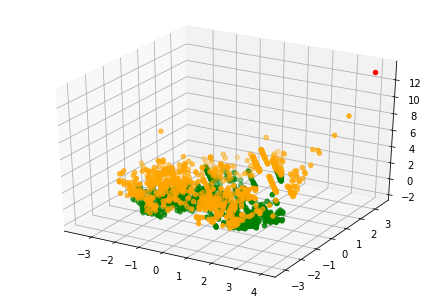

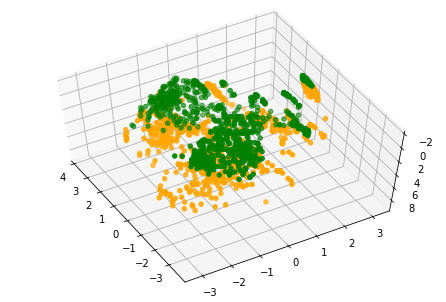

In [ ]:
#filter rows of original data
from mpl_toolkits.mplot3d import Axes3D

x_3dr = finalDf_3d[finalDf_3d['labels' ]== 0]
y_3dr = finalDf_3d[finalDf_3d['labels'] == 1]
#First orientation
fig1=plt.figure(1)
ax=Axes3D(fig1)
#Plotting the results
ax.scatter(y_3dr.iloc[:1000,0], y_3dr.iloc[:1000,1], y_3dr.iloc[:1000,2], c = 'orange')
ax.scatter(x_3dr.iloc[:1000,0], x_3dr.iloc[:1000,1], x_3dr.iloc[:1000,2], color = 'green')
#Projeter min
min = finalDf_3d.iloc[point_min].iloc[:, :-1].values
a,b,c = min[0]
ax.scatter(a, b, c, color = 'red')

#Second orientation
fig2=plt.figure(2)
ax=Axes3D(fig2)
#Plotting the results
ax.scatter(y_3dr.iloc[:1000,0], y_3dr.iloc[:1000,1], y_3dr.iloc[:1000,2], color = 'orange')
ax.scatter(x_3dr.iloc[:1000,0], x_3dr.iloc[:1000,1], x_3dr.iloc[:1000,2], color = 'green')
ax.view_init(-120, 30)
plt.show()

In [ ]:
print('score min:%s  \n score max : %s'%(data['scores'].min(),data['scores'].max()))

score min:-0.20930812167487012  
 score max : 0.10527277169585603


In [ ]:
data.iloc[point_min]

,codeNetwork,codePDA,codeSalePoint,codeService,loginAgent,type,network_groupe_code,spareOp4,montant_total,heure,min,scores,labels
221198,18.0,2.0,45.0,200.0,5991.0,134.0,3.0,0.0,30000000.0,0.965926,0.994522,-0.209308,1


Nous constatons que le score  se trouve dans un intervalle reduit ce qui montre que l'anomalie sur ces données n'est pas si élevée.